In [23]:
import variableImageSize as vis
import os
from glob import glob
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Path to dataset
root_dir = "./data/MNIST/mnist-varres/test/"

# Load images grouped by resolution
tensors_32, tensors_48, tensors_64 = vis.load_images_by_resolution(root_dir)
test_tensors_by_resolution = {
    32: tensors_32,
    48: tensors_48,
    64: tensors_64,
}
root_dir = "./data/MNIST/mnist-varres/train/"
tensors_32, tensors_48, tensors_64 = vis.load_images_by_resolution(root_dir)
train_tensors_by_resolution = {
    32: tensors_32,
    48: tensors_48,
    64: tensors_64,
}
# Print the size of each group
# print(f"32x32: Images {tensor_32[0].shape}, Labels {tensor_32[1].shape}")
# print(f"48x48: Images {tensor_48[0].shape}, Labels {tensor_48[1].shape}")
# print(f"64x64: Images {tensor_64[0].shape}, Labels {tensor_64[1].shape}")

In [25]:
model = vis.VariableInputNetwork(num_classes=10, N=81, pooling_type='max')
print(model)

# Test with variable input sizes
input_32 = torch.randn(8, 1, 32, 32)  # Batch of 8 images, resolution 32x32
input_48 = torch.randn(8, 1, 48, 48)  # Batch of 8 images, resolution 48x48
input_64 = torch.randn(8, 1, 64, 64)  # Batch of 8 images, resolution 64x64

output_32 = model(input_32)  # Should output (8, 10)
output_48 = model(input_48)  # Should output (8, 10)
output_64 = model(input_64)  # Should output (8, 10)

print(f"Output shape for 32x32 input: {output_32.shape}")
print(f"Output shape for 48x48 input: {output_48.shape}")
print(f"Output shape for 64x64 input: {output_64.shape}")

VariableInputNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 81, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (fc): Linear(in_features=81, out_features=10, bias=True)
)
Output shape for 32x32 input: torch.Size([8, 10])
Output shape for 48x48 input: torch.Size([8, 10])
Output shape for 64x64 input: torch.Size([8, 10])


In [26]:
print(vis.count_parameters(model))

29029


In [27]:
results = vis.train_and_compare_pooling(train_tensors_by_resolution, test_tensors_by_resolution, num_epochs=5)



Training with MAX pooling:
Epoch 1/5
Training on resolution 32x32:


  Train Loss: 0.7483, Train Acc: 77.46%
Training on resolution 48x48:
  Train Loss: 0.1914, Train Acc: 94.21%
Training on resolution 64x64:
  Train Loss: 0.1426, Train Acc: 95.56%
--------------------------------------------------
Epoch 2/5
Training on resolution 32x32:
  Train Loss: 0.1063, Train Acc: 96.69%
Training on resolution 48x48:
  Train Loss: 0.0926, Train Acc: 97.14%
Training on resolution 64x64:
  Train Loss: 0.0844, Train Acc: 97.42%
--------------------------------------------------
Epoch 3/5
Training on resolution 32x32:
  Train Loss: 0.0751, Train Acc: 97.55%
Training on resolution 48x48:
  Train Loss: 0.0639, Train Acc: 97.94%
Training on resolution 64x64:
  Train Loss: 0.0615, Train Acc: 98.15%
--------------------------------------------------
Epoch 4/5
Training on resolution 32x32:
  Train Loss: 0.0580, Train Acc: 98.17%
Training on resolution 48x48:
  Train Loss: 0.0498, Train Acc: 98.41%
Training on resolution 64x64:
  Train Loss: 0.0516, Train Acc: 98.36%
-------

In [ ]:
results, confusion_matrix_pooling, conf_matrix_results = vis.train_max_pooling(train_tensors_by_resolution, test_tensors_by_resolution, num_epochs=15)


Training with MAX pooling:
Epoch 1/8
Training on resolution 32x32:
  Train Loss: 0.8278, Train Acc: 75.45%
Training on resolution 48x48:
  Train Loss: 0.1964, Train Acc: 94.22%
Training on resolution 64x64:
  Train Loss: 0.1425, Train Acc: 95.62%
--------------------------------------------------
Epoch 2/8
Training on resolution 32x32:
  Train Loss: 0.1166, Train Acc: 96.39%
Training on resolution 48x48:
  Train Loss: 0.0946, Train Acc: 97.19%
Training on resolution 64x64:
  Train Loss: 0.0937, Train Acc: 97.10%
--------------------------------------------------
Epoch 3/8
Training on resolution 32x32:
  Train Loss: 0.0766, Train Acc: 97.57%
Training on resolution 48x48:
  Train Loss: 0.0688, Train Acc: 97.83%
Training on resolution 64x64:
  Train Loss: 0.0739, Train Acc: 97.69%
--------------------------------------------------
Epoch 4/8
Training on resolution 32x32:
  Train Loss: 0.0636, Train Acc: 98.08%
Training on resolution 48x48:
  Train Loss: 0.0582, Train Acc: 98.20%
Training 

In [29]:
results

{'max': {32: (0.043686436092507795, 98.74579382074029),
  48: (0.05401419597013758, 98.1958000591541),
  64: (0.03758179400561016, 98.83582089552239)}}

In [30]:
confusion_matrix_pooling

tensor([[9.6000e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         4.0000e+00, 0.0000e+00, 1.3000e+01, 2.0000e+00],
        [0.0000e+00, 1.1290e+03, 1.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.0000e+00, 1.0170e+03, 4.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 3.0000e+00, 5.0000e+00, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0050e+03, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 9.5500e+02, 0.0000e+00,
         1.0000e+00, 2.0000e+00, 6.0000e+00, 1.6000e+01],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 1.4000e+01, 0.0000e+00, 8.7100e+02,
         1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00],
        [2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
         9.4300e+02, 0.0000e+00, 7.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.0000

# Final comparison

## Loading the resized data

In [31]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor, Grayscale
import matplotlib.pyplot as plt
import NN_utils

# Load the variable resolution dataset
varres_transform = Compose([  
    Resize((28, 28)),
    Grayscale(num_output_channels=1),
    ToTensor()
])

varres_test = ImageFolder(root='./data/MNIST/mnist-varres/test', transform=varres_transform)

vatters_train = ImageFolder(root='./data/MNIST/mnist-varres/train', transform=varres_transform)

# Split into training and validation sets
train_size = int(0.8 * len(vatters_train))
val_size = len(vatters_train) - train_size
train_varres_dataset, val_varres_dataset = torch.utils.data.random_split(vatters_train, [train_size, val_size])


# Create data loaders
train_varres_loader = DataLoader(train_varres_dataset, batch_size=len(train_varres_dataset), shuffle=True)
val_varres_loader = DataLoader(val_varres_dataset, batch_size=len(val_varres_dataset), shuffle=False)

test_varres_loader = DataLoader(varres_test, batch_size=len(varres_test), shuffle=False)


#load the whole dataset into tensors
x_train_resized, y_train_resized= next(iter(train_varres_loader))
x_val_resized, y_val_resized = next(iter(val_varres_loader))
x_test_resized, y_test_resized = next(iter(test_varres_loader))

## Training and testing model from q12

In [ ]:
import torch.nn as nn

# do the same as above but with the test set
model = NN_utils.MNISTConvNet().to("cuda")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_test_resized, y_test_resized = x_test_resized.to(device), y_test_resized.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
batch_size = 32

first_epoch_running_loss, train_evaluations, test_evaluations = NN_utils.train(model, x_train_resized, y_train_resized, x_test_resized, y_test_resized, optimizer, criterion, epochs=15, batch_size=batch_size)


confuzion_matrix_resized = NN_utils.confusion_matrix(model, x_test_resized, y_test_resized, batch=batch_size)


Batches for epoch 1/8:   0%|          | 0/1500 [00:00<?, ?it/s]

Batches for epoch 1/8: 100%|██████████| 1500/1500 [00:02<00:00, 690.47it/s]


Epoch 1/8, Train Loss: 0.0110, Train Acc: 0.8913, Val Loss: 0.0107, Val Acc: 0.8934


Batches for epoch 2/8: 100%|██████████| 1500/1500 [00:02<00:00, 658.76it/s]


Epoch 2/8, Train Loss: 0.0066, Train Acc: 0.9365, Val Loss: 0.0066, Val Acc: 0.9363


Batches for epoch 3/8: 100%|██████████| 1500/1500 [00:02<00:00, 687.40it/s]


Epoch 3/8, Train Loss: 0.0049, Train Acc: 0.9525, Val Loss: 0.0052, Val Acc: 0.9511


Batches for epoch 4/8: 100%|██████████| 1500/1500 [00:02<00:00, 724.32it/s]


Epoch 4/8, Train Loss: 0.0040, Train Acc: 0.9622, Val Loss: 0.0044, Val Acc: 0.9592


Batches for epoch 5/8: 100%|██████████| 1500/1500 [00:02<00:00, 716.55it/s]


Epoch 5/8, Train Loss: 0.0033, Train Acc: 0.9690, Val Loss: 0.0040, Val Acc: 0.9625


Batches for epoch 6/8: 100%|██████████| 1500/1500 [00:02<00:00, 739.18it/s]


Epoch 6/8, Train Loss: 0.0030, Train Acc: 0.9705, Val Loss: 0.0040, Val Acc: 0.9618


Batches for epoch 7/8: 100%|██████████| 1500/1500 [00:02<00:00, 735.96it/s]


Epoch 7/8, Train Loss: 0.0032, Train Acc: 0.9694, Val Loss: 0.0044, Val Acc: 0.9592


Batches for epoch 8/8: 100%|██████████| 1500/1500 [00:02<00:00, 637.46it/s]


Epoch 8/8, Train Loss: 0.0024, Train Acc: 0.9758, Val Loss: 0.0039, Val Acc: 0.9655


In [34]:
#print accuracy and loss at the end of training
print(f"Accuracy on test set: {test_evaluations[-1,1]}")


Accuracy on test set: 0.9655


## Plotting both confusion matrices

In [35]:
# function to plot the confusion matrix as percentages with a heatmap using seaborn, expects a confusion matrix as input as counts of predictions, we have to convert it to percentages

import seaborn as sns

import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):


    # convert the counts to percentages
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)[:, None]
    # plot the heatmap

    plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_matrix, annot=True, fmt=".2%", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    #plt.title('Confusion Matrix')
    plt.show()

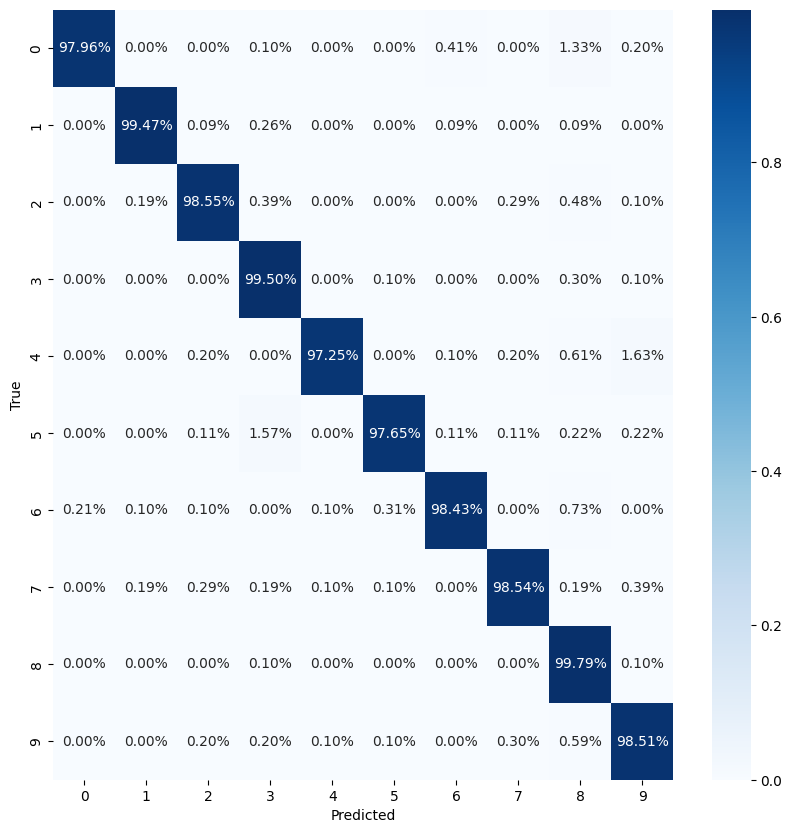

In [36]:
plot_confusion_matrix(confusion_matrix_pooling)

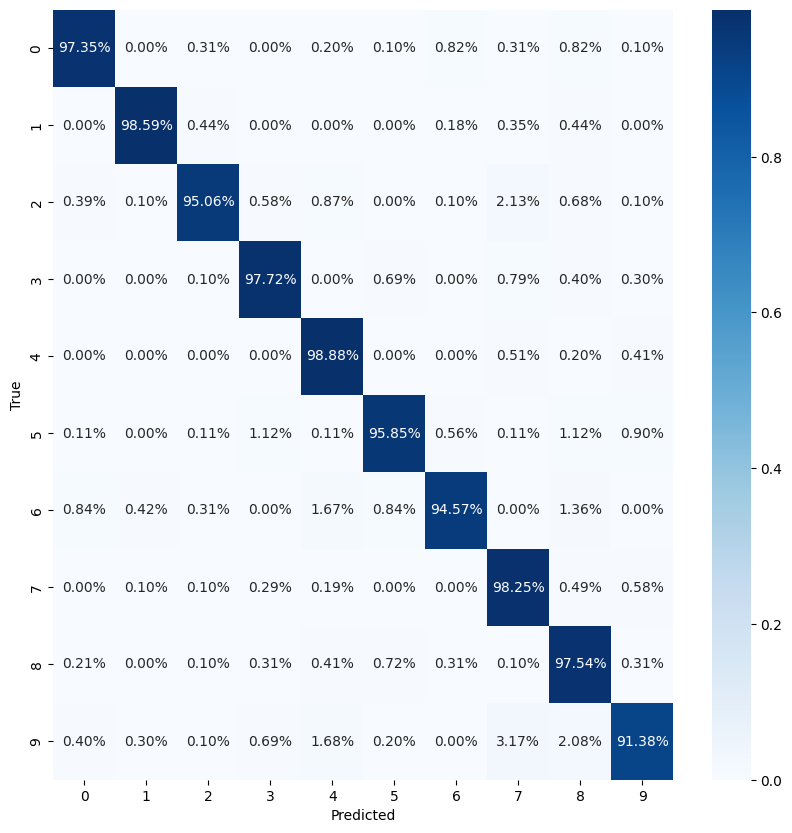

In [37]:
plot_confusion_matrix(confuzion_matrix_resized)